In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import os
import sys
sys.path.append("../")
from data import gestalt
from models import SIMONe, bvae
%load_ext autoreload
%autoreload 2
import torch.nn.functional as F
from tqdm import tqdm_notebook

In [2]:
model_checkpoint_dir = "/om2/user/yyf/GestaltVision/saved_models/SAVI/tex=all_shapes=2,3_slots=4"
models = os.listdir(model_checkpoint_dir)
models.sort()

latest = models[-1]
model_chkpt = os.path.join(model_checkpoint_dir, latest)
chkpt = torch.load(model_chkpt, map_location="cpu")

In [4]:
data = gestalt.Gestalt(top_level=["train_voronoi"], sub_level=["superquadric_3", "superquadric_4"], 
                       frames_per_scene=10,
                        passes=["depths"])
data.training = True

12638 # training scenes, 1402 # test scenes


In [5]:
batch = torch.stack([data.__getitem__(i)["depths"] for i in [1]], 0)
images = batch

In [6]:
images.shape

torch.Size([1, 10, 3, 128, 128])

In [7]:
simone = SIMONe.SIMONE(images.shape, 128, K_slots=16).to("cuda")

In [ ]:
track_losses = []
optim = torch.optim.Adam(simone.parameters(), lr=2e-3)
for i in tqdm_notebook(range(300)):
    optim.zero_grad()
    images = images.to("cuda")
    out = simone(images)
    losses = simone.compute_loss(images, out)
    losses["total_loss"].backward()
    optim.step()
    track_losses.append(losses["total_loss"].item())
    print(losses["total_loss"].item())

/tmp/ipykernel_167759/1445976237.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(300)):


  0%|          | 0/300 [00:00<?, ?it/s]

4838.11474609375
4209.38232421875
3784.627197265625
2927.1259765625
2082.4130859375
1731.5313720703125
1340.59375
1291.4500732421875
1432.8193359375
1231.1046142578125
1209.253662109375
1119.45263671875
1000.2394409179688
968.9766845703125
962.9711303710938
897.6527099609375
886.6917114257812
857.7273559570312
862.7501831054688
837.2465209960938
808.0267944335938
765.44677734375
748.18359375
735.7140502929688
703.72509765625
684.6652221679688
667.107177734375
655.7505493164062
620.22802734375
593.1555786132812
583.0233154296875
568.1792602539062
539.86962890625
535.0662231445312
536.1934814453125
513.7692260742188
505.4057922363281
508.111083984375
497.3565368652344
507.6033020019531
508.8438415527344
520.3093872070312
517.4850463867188
522.0469360351562
491.2463684082031
511.6010437011719
514.0201416015625
494.8778991699219
515.44189453125
500.17230224609375
502.8622741699219
500.5357971191406
488.9661865234375
503.3213806152344
491.87530517578125
493.95843505859375
490.91632080078125

In [ ]:
plt.plot(range(len(track_losses)), track_losses)

In [ ]:
dist = out["pixel_dists"]
for i in range(10):
    plt.imshow(dist.sample().detach().cpu().numpy()[0, 0])
    plt.show()

In [ ]:
for i in range(6):
    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    axs[0].imshow(images[0,i].detach().cpu().numpy().transpose(1, 2, 0))
    axs[1].imshow(recons[0,i])
    plt.show()

In [99]:
recons = out["recons"].squeeze(0).detach().cpu().numpy()
masks = out["masks"].squeeze(0).detach().cpu().numpy()
slots = out["slots"].squeeze(0).detach().cpu().numpy()
recon_all = out["recon_combined"].squeeze(0).detach().cpu().numpy()

In [373]:
spatial_coords = torch.linspace(-1, 1, H)
xv, yv = torch.meshgrid([spatial_coords, spatial_coords], indexing="xy")
ll = torch.stack([xv, yv], -1)
decode_idxs = einops.repeat(ll, "H W X -> B T H W X", B=B, T=T)

In [100]:
masks.shape

(6, 4, 128, 128, 1)

In [375]:
decode_idxs[0, 0, :, 0]

tensor([[-1.0000, -1.0000],
        [-1.0000, -0.9843],
        [-1.0000, -0.9685],
        [-1.0000, -0.9528],
        [-1.0000, -0.9370],
        [-1.0000, -0.9213],
        [-1.0000, -0.9055],
        [-1.0000, -0.8898],
        [-1.0000, -0.8740],
        [-1.0000, -0.8583],
        [-1.0000, -0.8425],
        [-1.0000, -0.8268],
        [-1.0000, -0.8110],
        [-1.0000, -0.7953],
        [-1.0000, -0.7795],
        [-1.0000, -0.7638],
        [-1.0000, -0.7480],
        [-1.0000, -0.7323],
        [-1.0000, -0.7165],
        [-1.0000, -0.7008],
        [-1.0000, -0.6850],
        [-1.0000, -0.6693],
        [-1.0000, -0.6535],
        [-1.0000, -0.6378],
        [-1.0000, -0.6220],
        [-1.0000, -0.6063],
        [-1.0000, -0.5906],
        [-1.0000, -0.5748],
        [-1.0000, -0.5591],
        [-1.0000, -0.5433],
        [-1.0000, -0.5276],
        [-1.0000, -0.5118],
        [-1.0000, -0.4961],
        [-1.0000, -0.4803],
        [-1.0000, -0.4646],
        [-1.0000, -0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


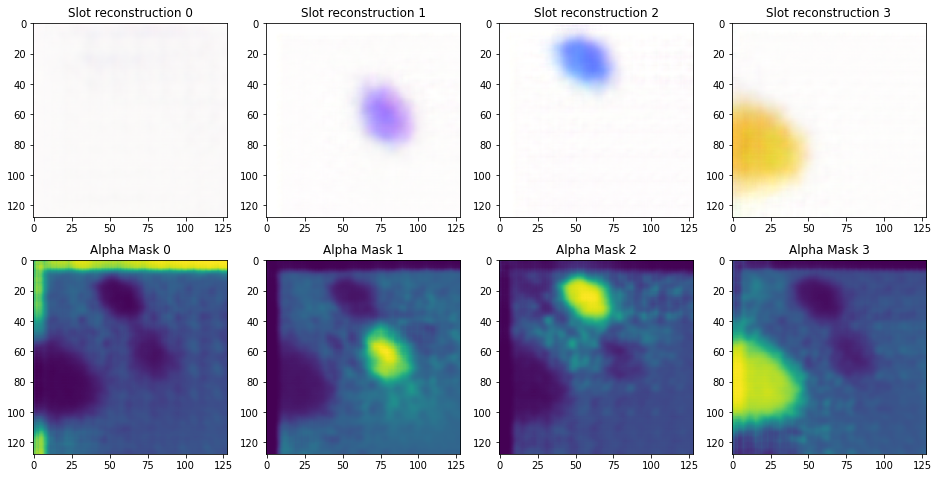

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


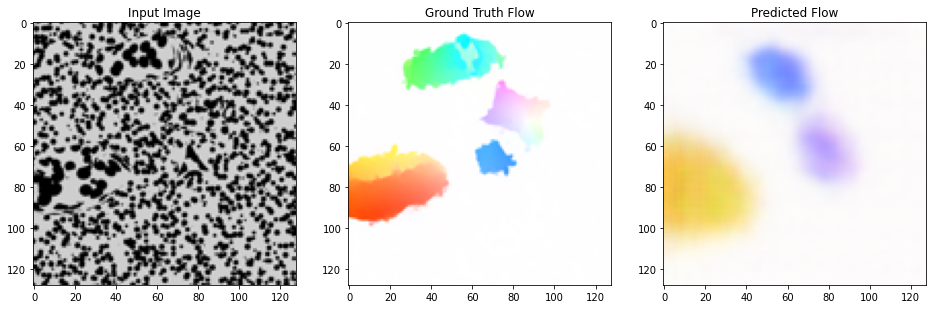

In [101]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
for i in range(4):
    msk = masks[4, i]
    recon = recons[4, i]
    axs[1, i].imshow(msk)
    axs[0, i].imshow(recon)
    

    axs[0][i].set_title(f"Slot reconstruction {i}")
    axs[1][i].set_title(f"Alpha Mask {i}")

plt.show()

fig, axs = plt.subplots(1, 3, figsize=(16, 8))
axs[0].imshow(images.squeeze(0).cpu().numpy()[4].transpose(1, 2, 0))
axs[0].set_title("Input Image")

axs[1].imshow(flows.squeeze(0).cpu().numpy()[4].transpose(1, 2, 0))
axs[1].set_title("Ground Truth Flow")

axs[2].imshow(recon_all[4].transpose(1, 2, 0))
axs[2].set_title("Predicted Flow")

plt.show()

In [296]:
print(losses["frame_kl_loss"])

tensor(7.7395e-09, device='cuda:0', grad_fn=<MulBackward0>)


In [ ]:
imgs = torch.ones()

In [262]:
x = torch.distributions.independent.Independent(images, torch.tensor([0]))
rand = torch.randn_like(images)
lp = x.log_prob(rand)

AttributeError: 'Tensor' object has no attribute 'batch_shape'

In [250]:
x

Categorical(probs: torch.Size([1, 6, 3, 128, 128]))

In [232]:
import einops
a = torch.tensor([[1, 2], [4, 5]])
b = einops.repeat(a, "c d -> b c d", b=2, c=2)
b

tensor([[[1, 2],
         [4, 5]],

        [[1, 2],
         [4, 5]]])

In [222]:
print(recons.shape)

(1, 6, 3, 128, 128)


In [218]:
a = torch.nn.LayerNorm((64, 128))

In [219]:
b = torch.rand((4, 64, 128))
b2 = a(b)
b3 = F.softmax(b2, -1)
b3.min(), b3.max()

(tensor(0.0007, grad_fn=<MinBackward1>),
 tensor(0.0337, grad_fn=<MaxBackward1>))

In [63]:
from data import gestalt
from torch.utils.data import DataLoader

In [64]:
gt = DataLoader(gestalt.GestaltTest(), shuffle=True)

62635 # training scenes, 630 # test scenes


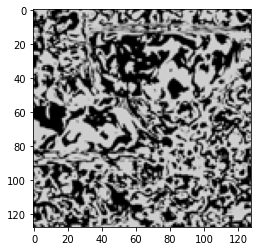

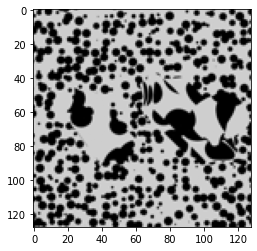

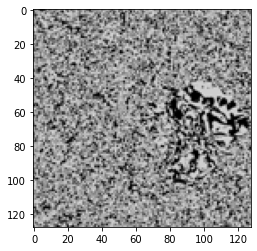

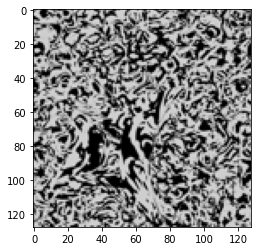

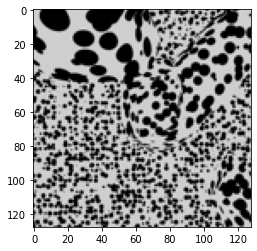

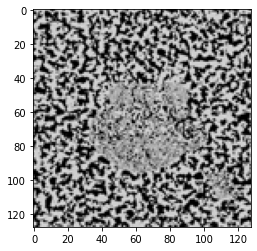

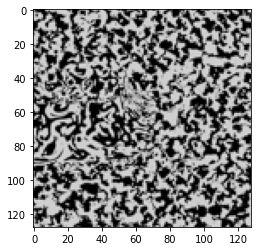

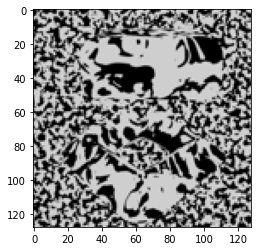

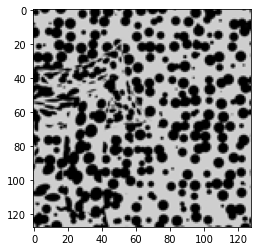

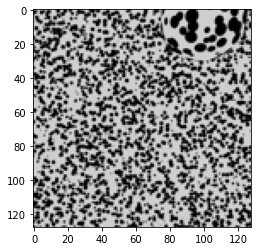

In [66]:
for i in range(10):
    batch = next(iter(gt))
    imgs = batch["images"]
    plt.imshow(imgs[0, 0].permute((1, 2, 0)))
    plt.show()